#### Importing Libraries

In [52]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

#### Importing Machine Learning Libraries

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

import pickle

#### Loading Data

In [99]:
df = pd.read_csv('dataset/Cellphone.csv')


In [100]:
df_copy=df.copy()

In [56]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [57]:
df.tail()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [58]:
df.sample(5)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
131,1089,1357,564,165.0,4.66,200,4,1.20,0.000,0.000,5.0,0.0,2600,11.6
37,662,2124,35,489.0,10.10,224,4,2.26,16.000,2.000,5.0,2.0,7400,7.8
48,162,1843,41,133.5,4.50,218,4,1.30,8.000,1.000,5.0,0.0,1600,10.1
126,1198,705,427,110.0,2.20,128,0,0.00,0.128,0.032,2.0,0.0,900,15.6
133,497,2266,599,112.0,5.00,294,8,1.40,8.000,1.000,8.0,8.0,1900,6.3


In [59]:
df.shape

(161, 14)

In [60]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_id,161.0,675.559006,410.851583,10.0,237.0,774.00,1026.000,1339.0
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
resoloution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
ppi,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
cpu core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
cpu freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
internal mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
ram,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0


In [63]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [64]:
df.duplicated().sum()

np.int64(0)

In [101]:
df.drop('Product_id', axis=1, inplace=True)

In [102]:
df.skew()

Price           0.052347
Sale            4.269384
weight          3.981756
resoloution     1.176110
ppi             0.602503
cpu core       -0.009077
cpu freq       -0.512663
internal mem    2.389683
ram             0.792698
RearCam         0.106929
Front_Cam       1.169750
battery         2.092660
thickness       1.587680
dtype: float64

In [67]:
pt = PowerTransformer(method='yeo-johnson')

In [68]:
exclude_column = 'Price'

In [69]:
transformed_columns = [col for col in df.columns if col not in exclude_column]

In [70]:
df[transformed_columns] = pt.fit_transform(df[transformed_columns])

In [71]:
df.skew()

Price           0.052347
Sale            0.086495
weight         -0.165116
resoloution     0.194987
ppi            -0.028039
cpu core       -0.114080
cpu freq        0.014312
internal mem   -0.007992
ram            -0.021790
RearCam        -0.194025
Front_Cam      -0.076752
battery         0.034020
thickness      -0.049220
dtype: float64

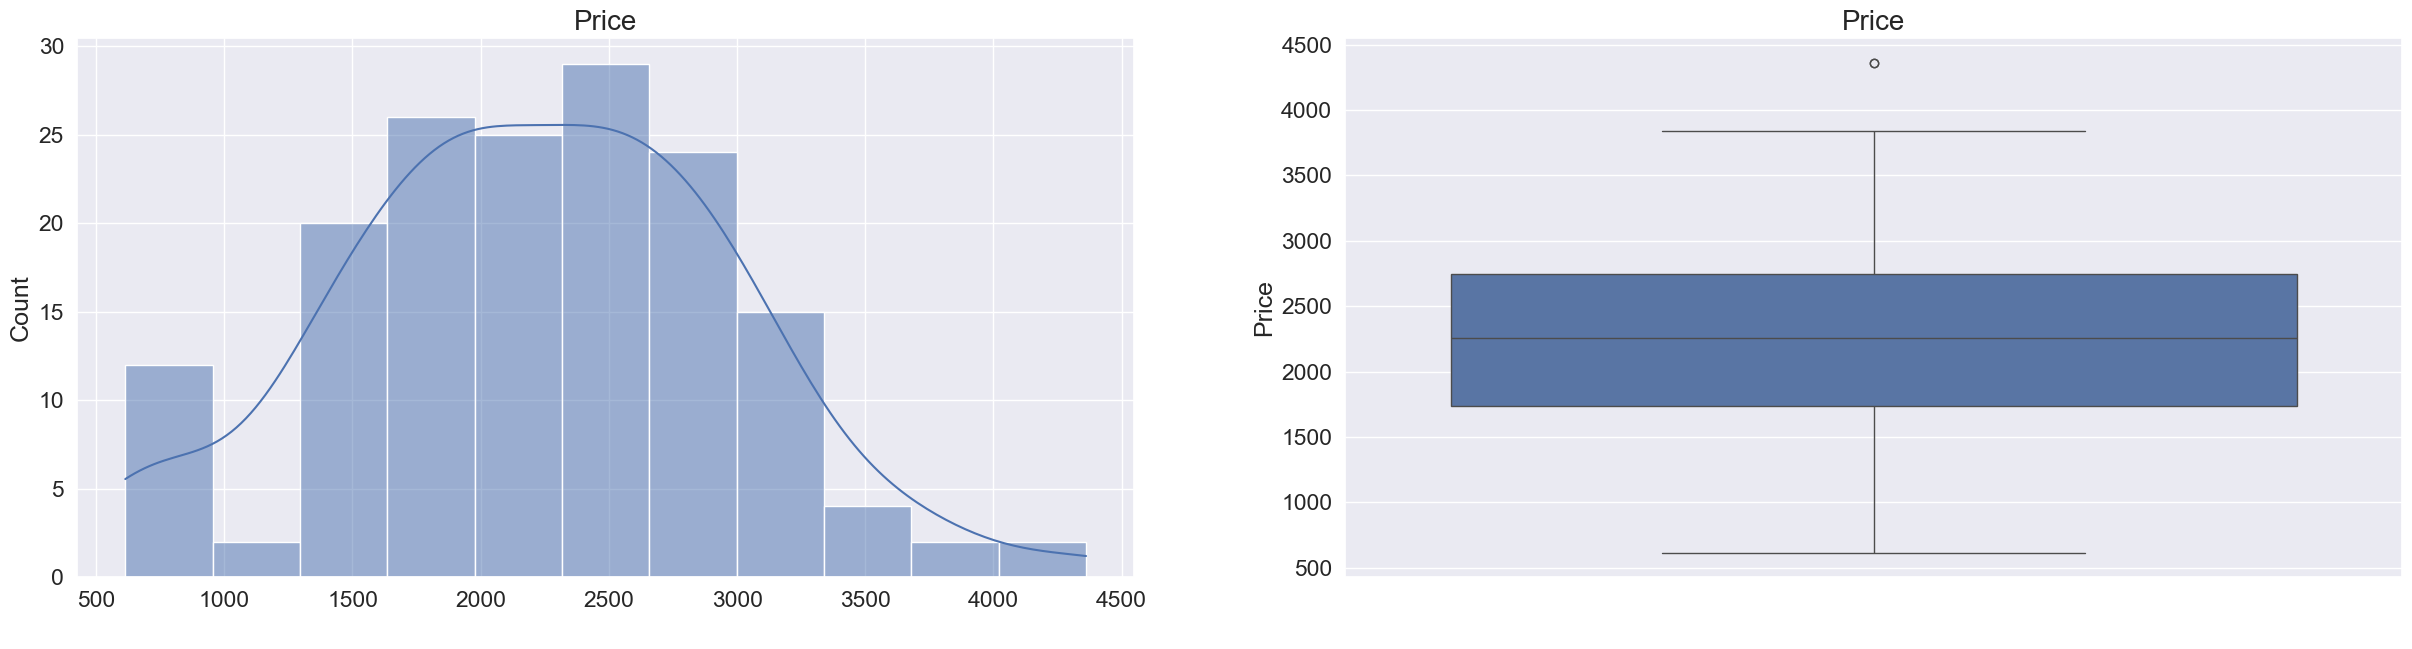

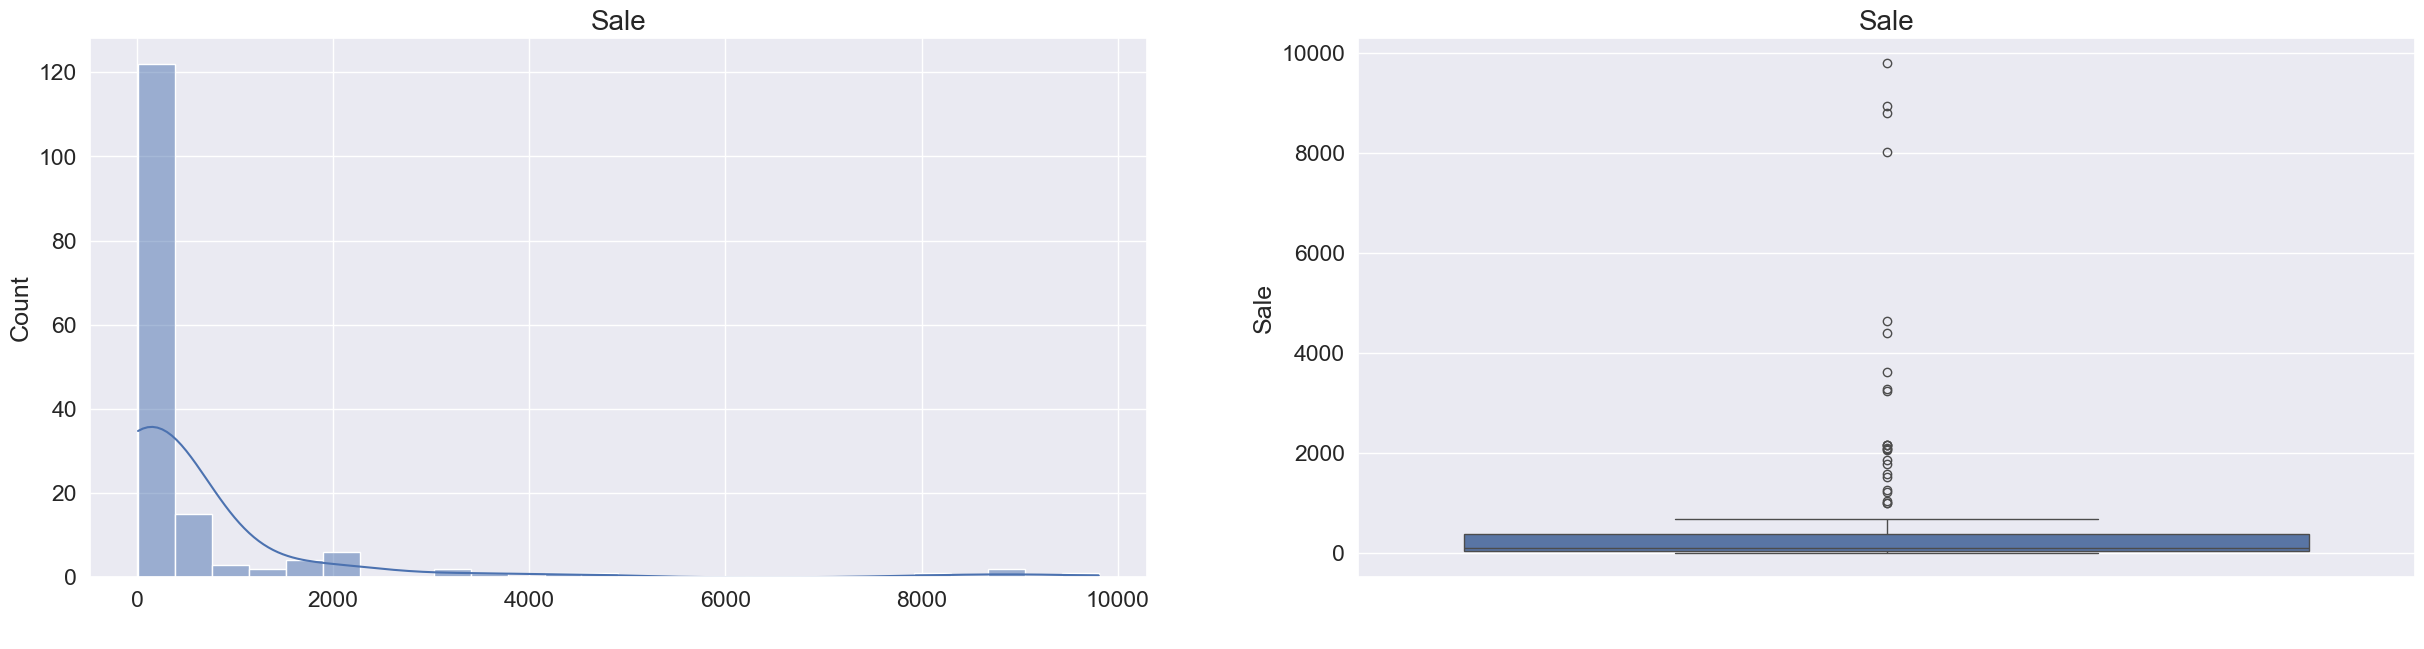

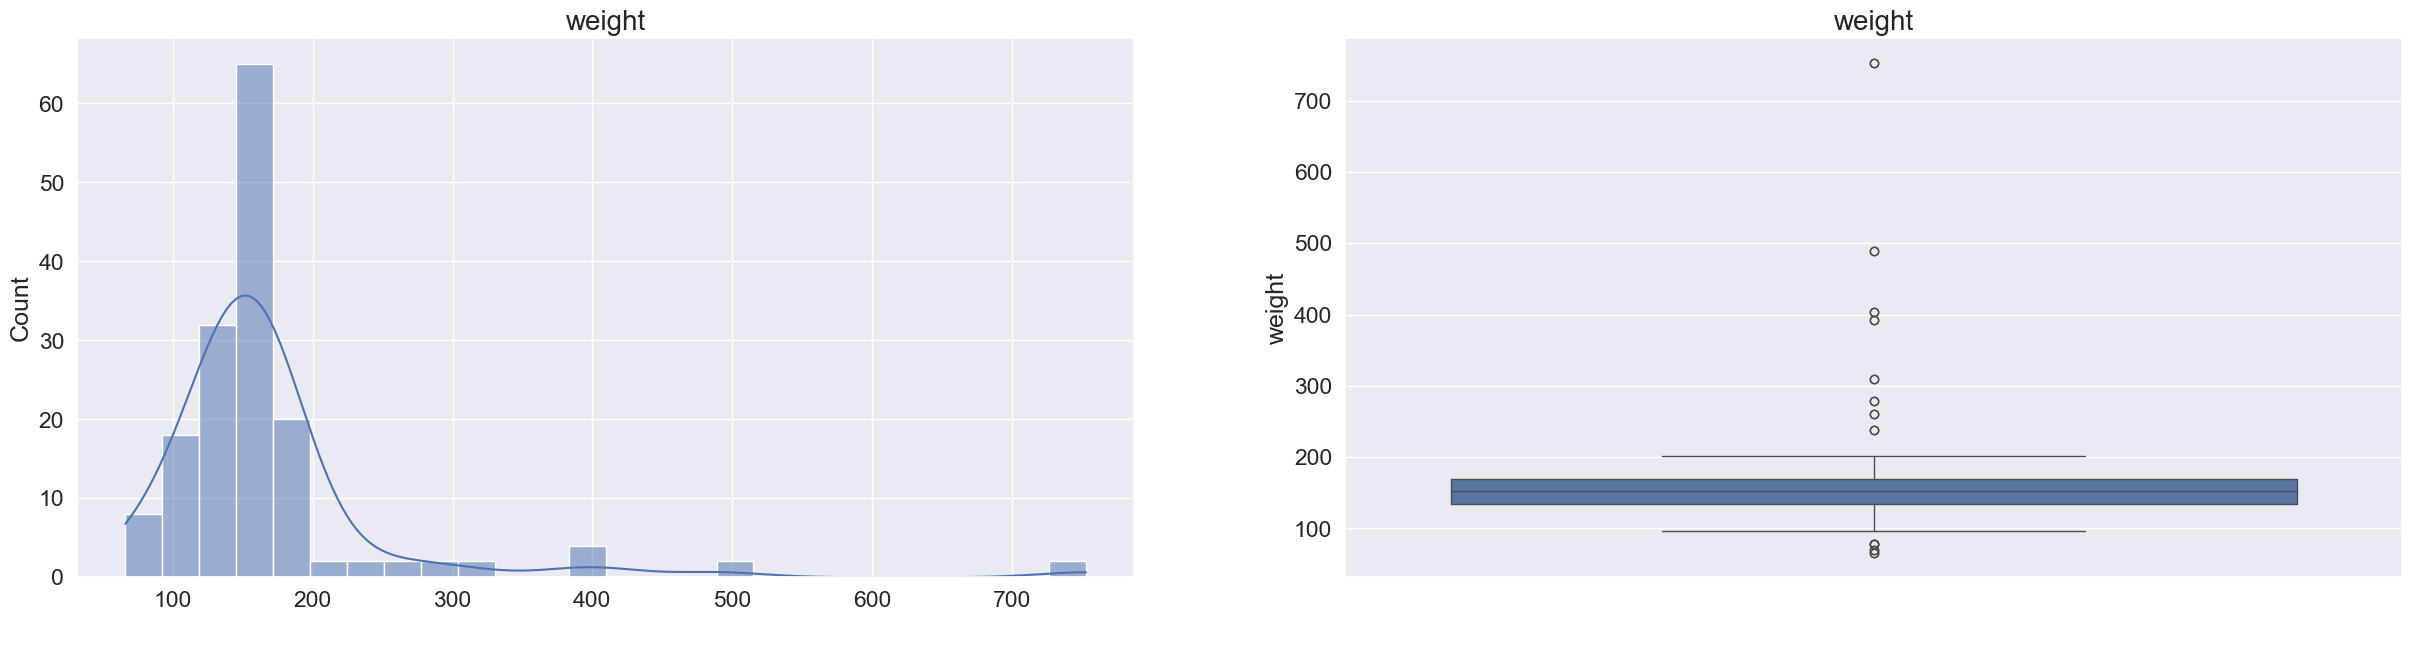

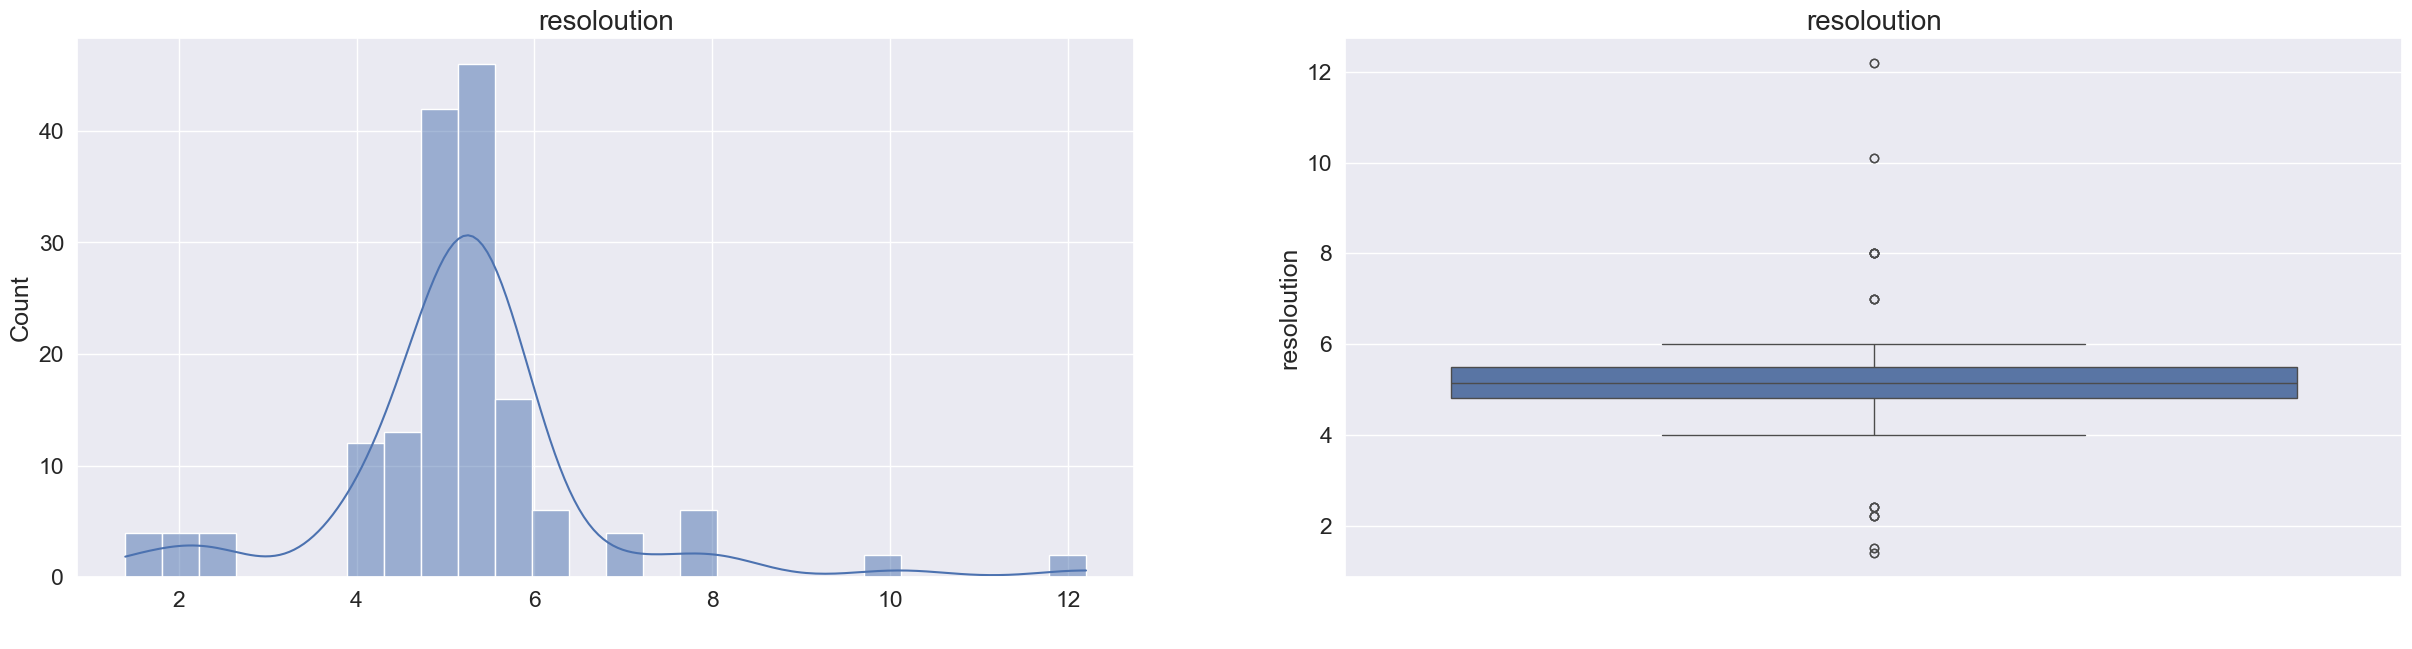

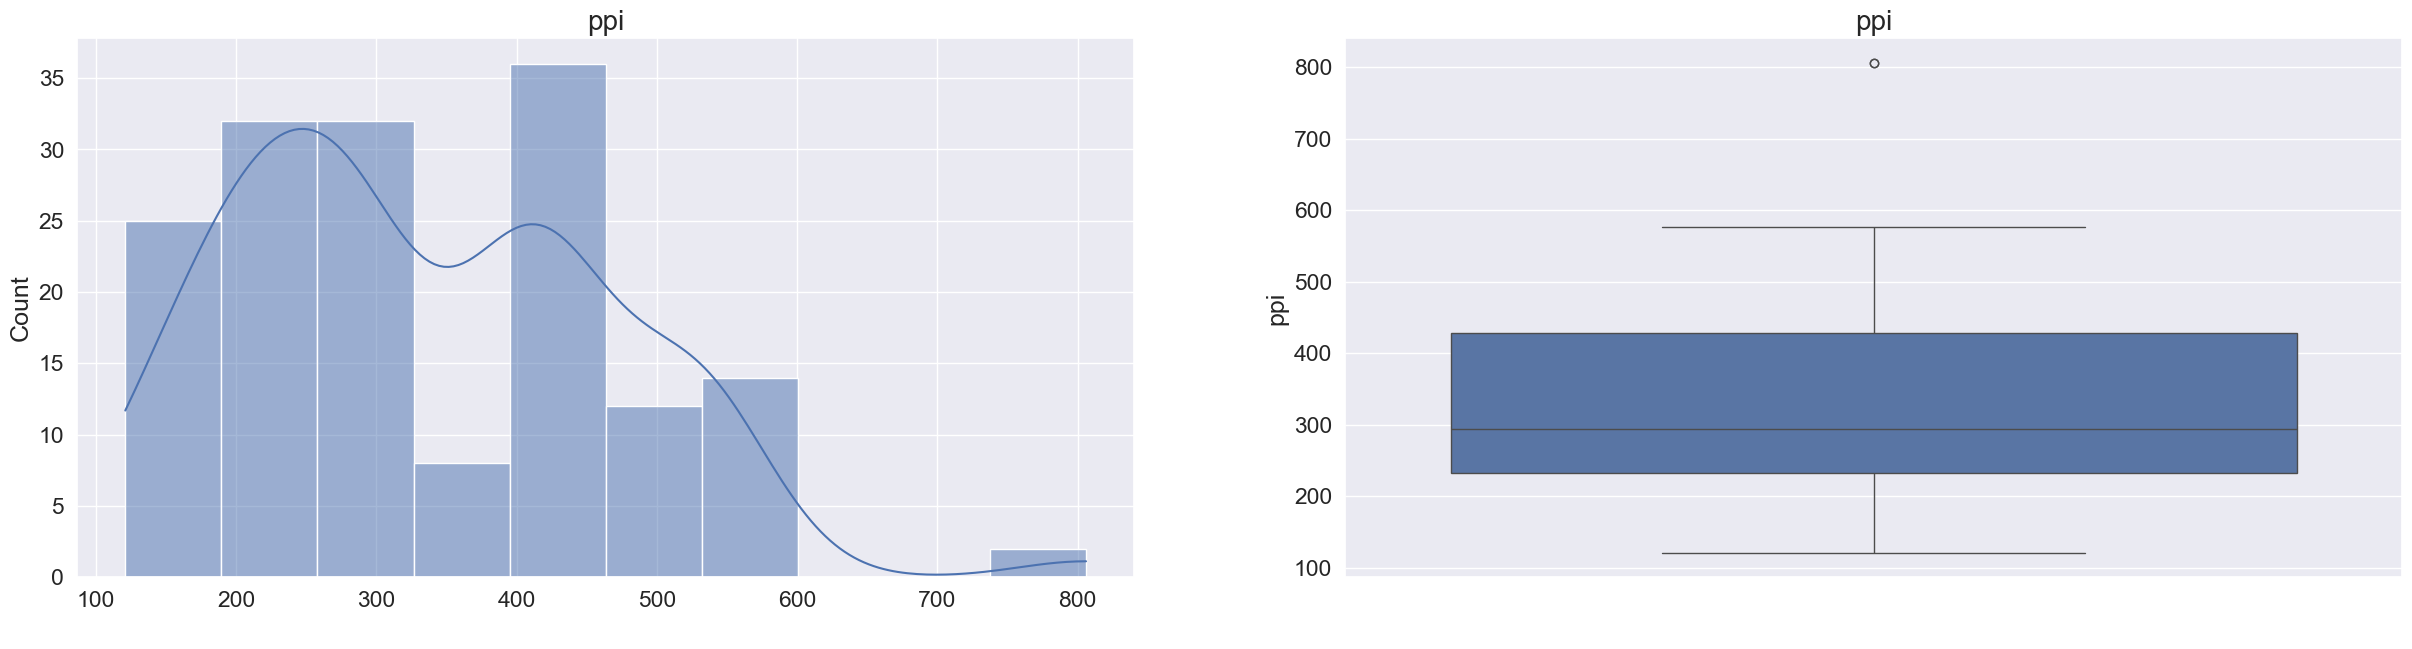

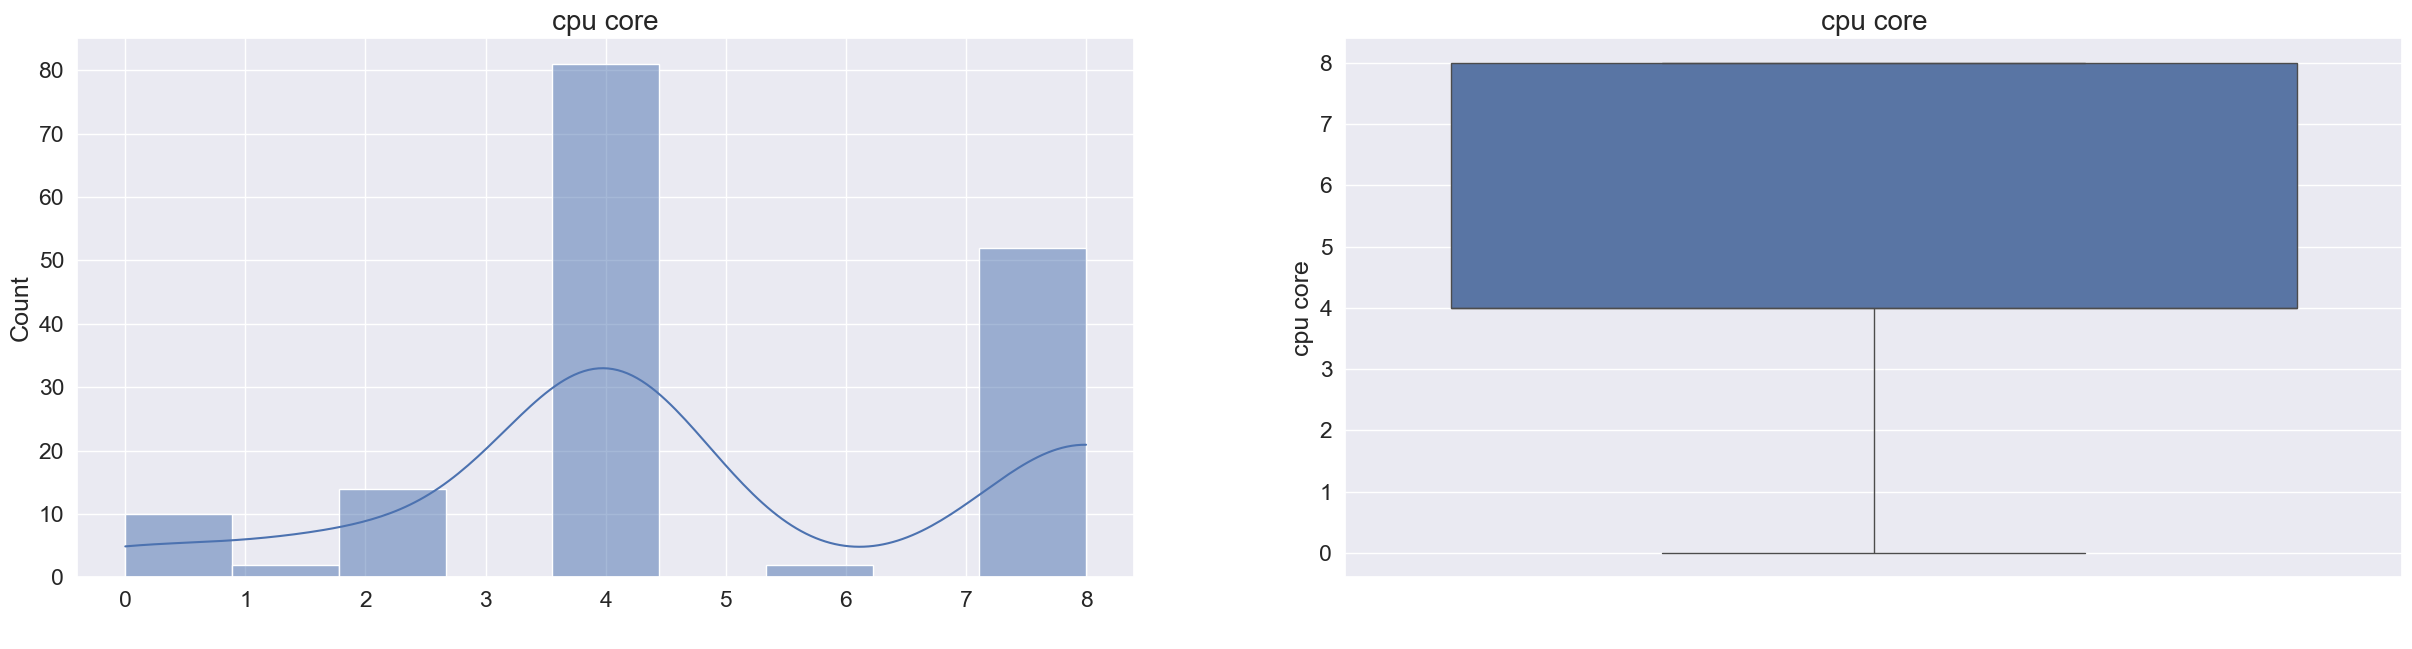

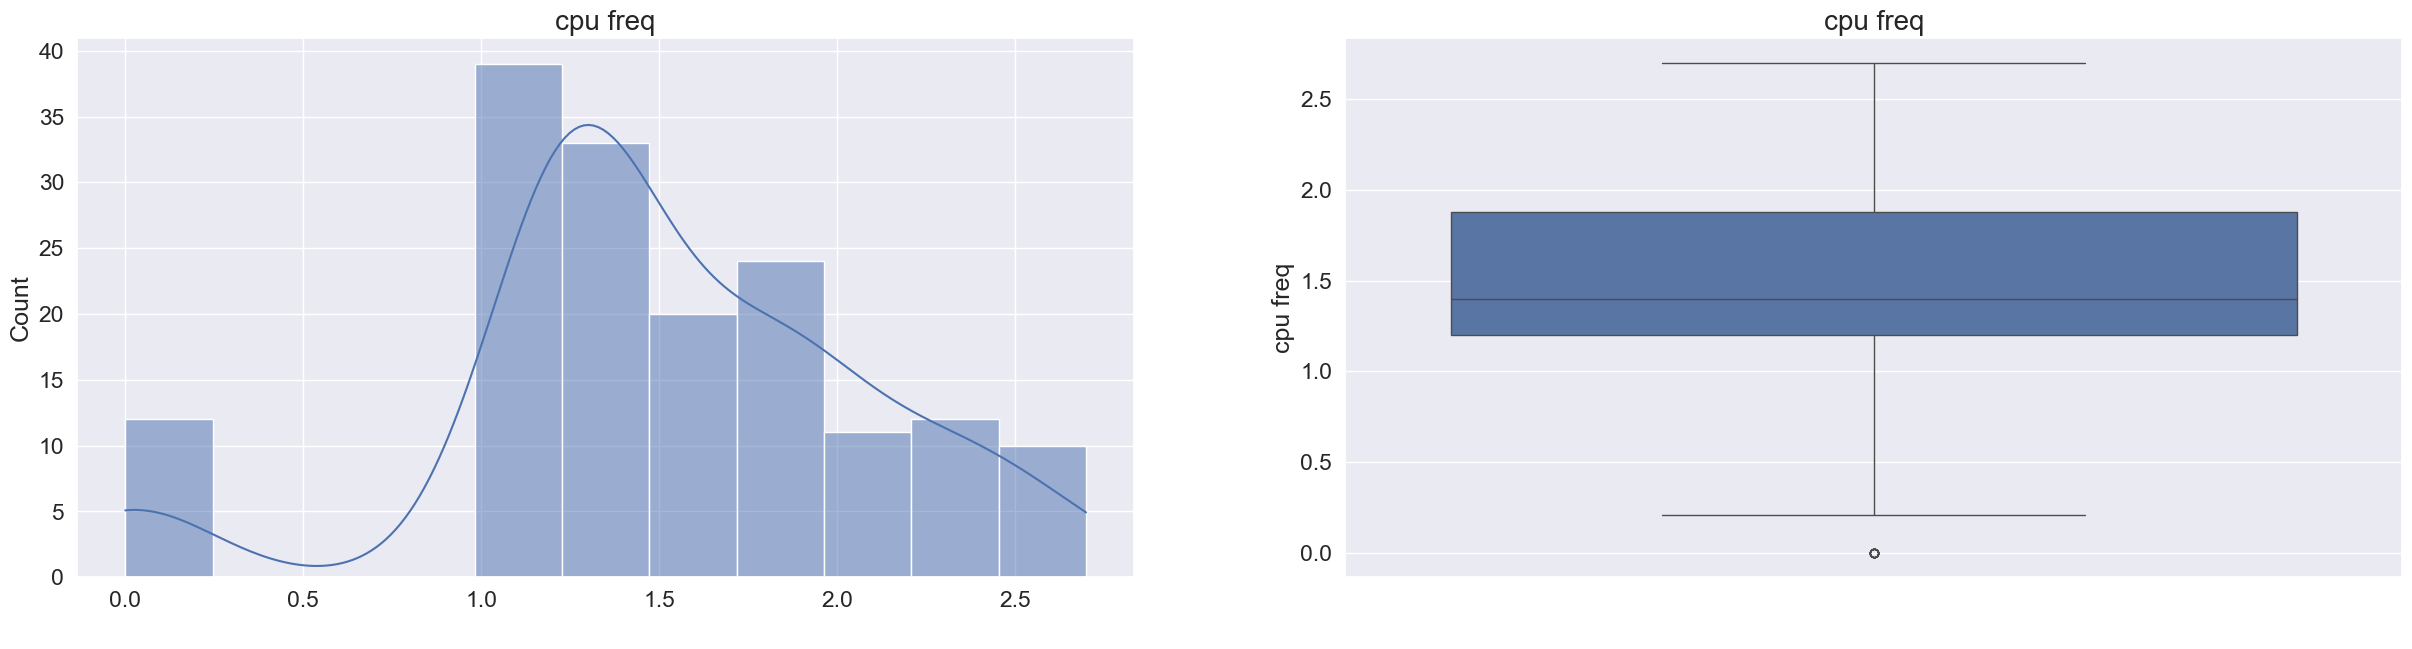

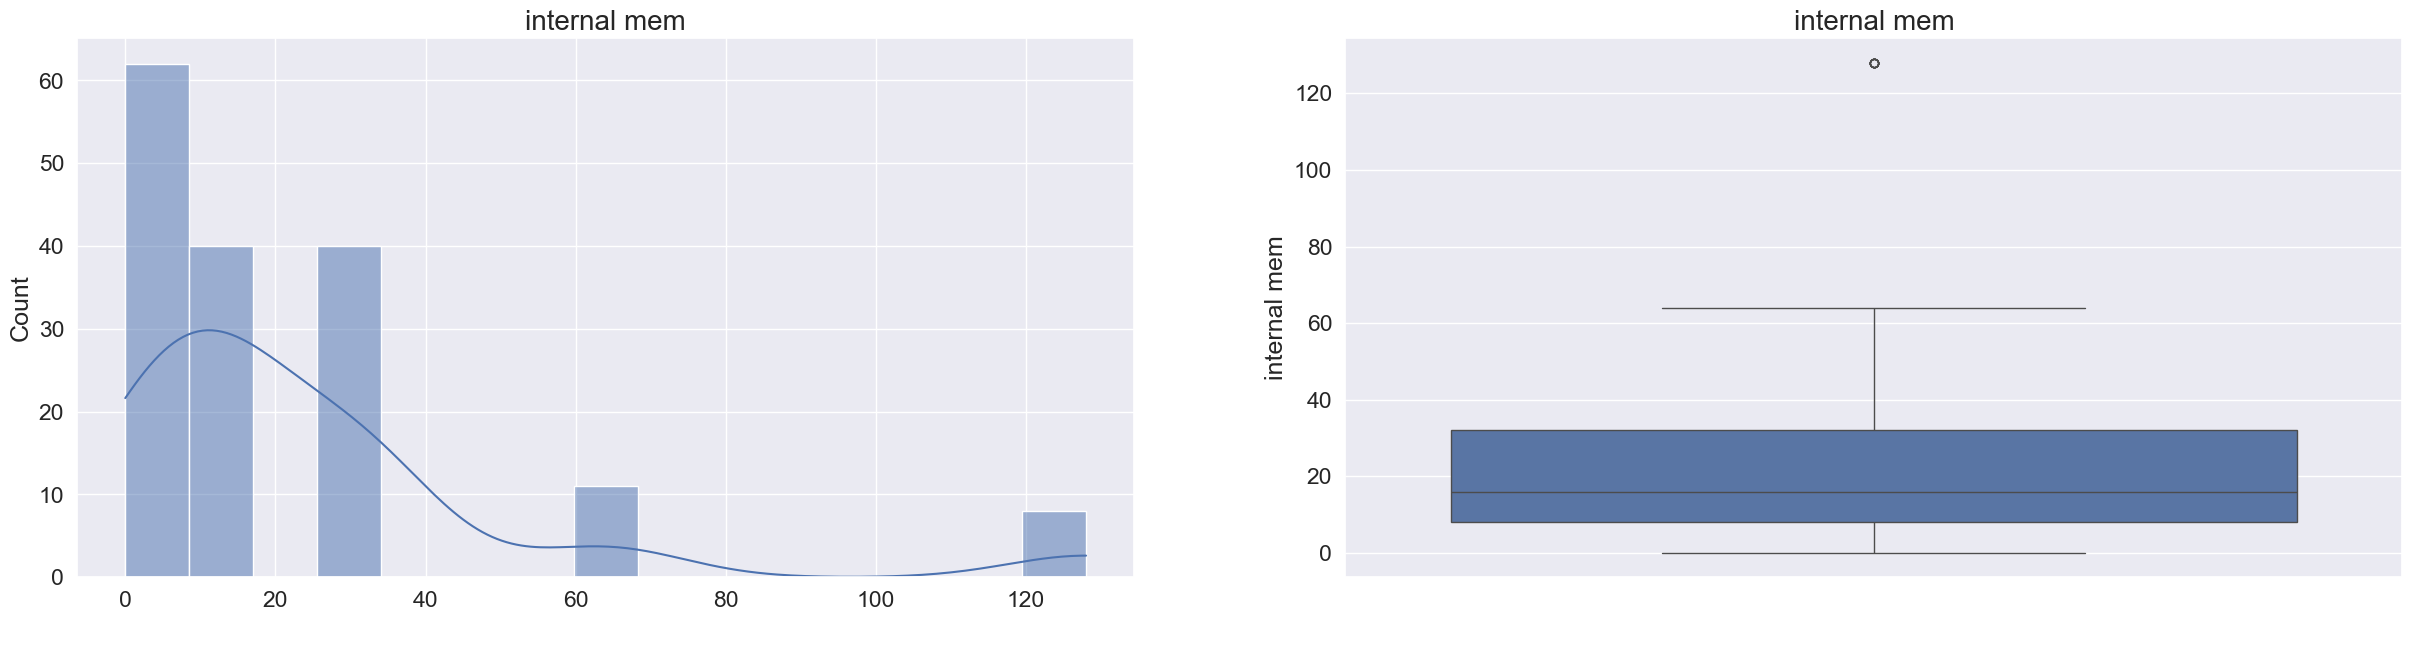

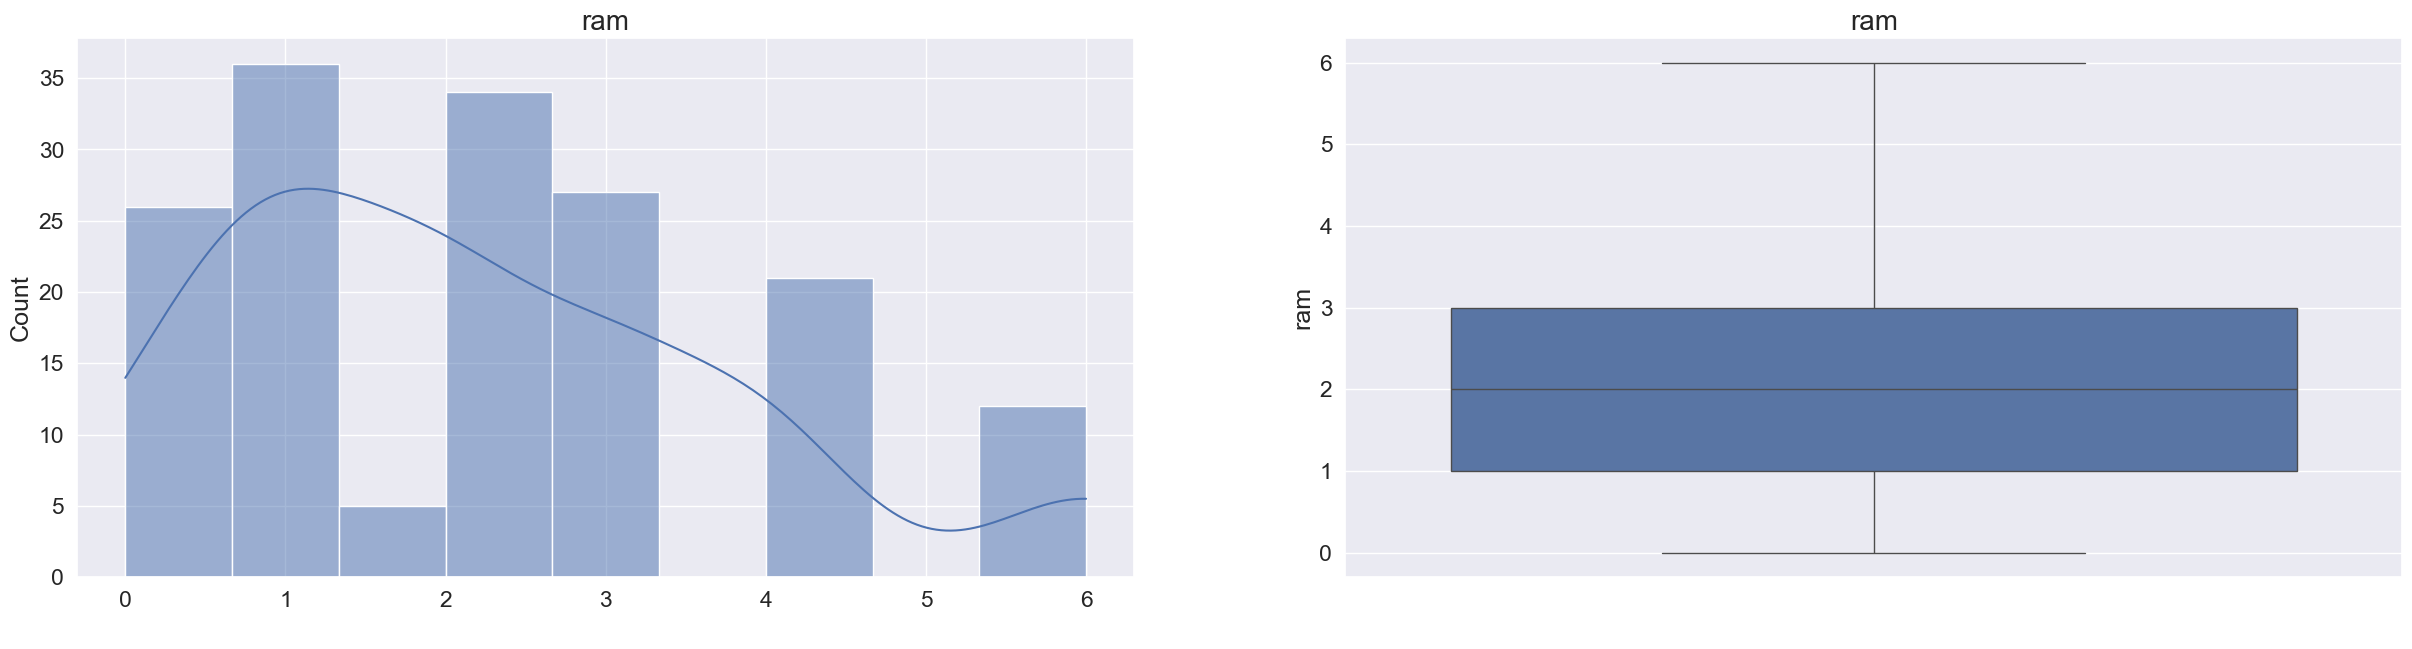

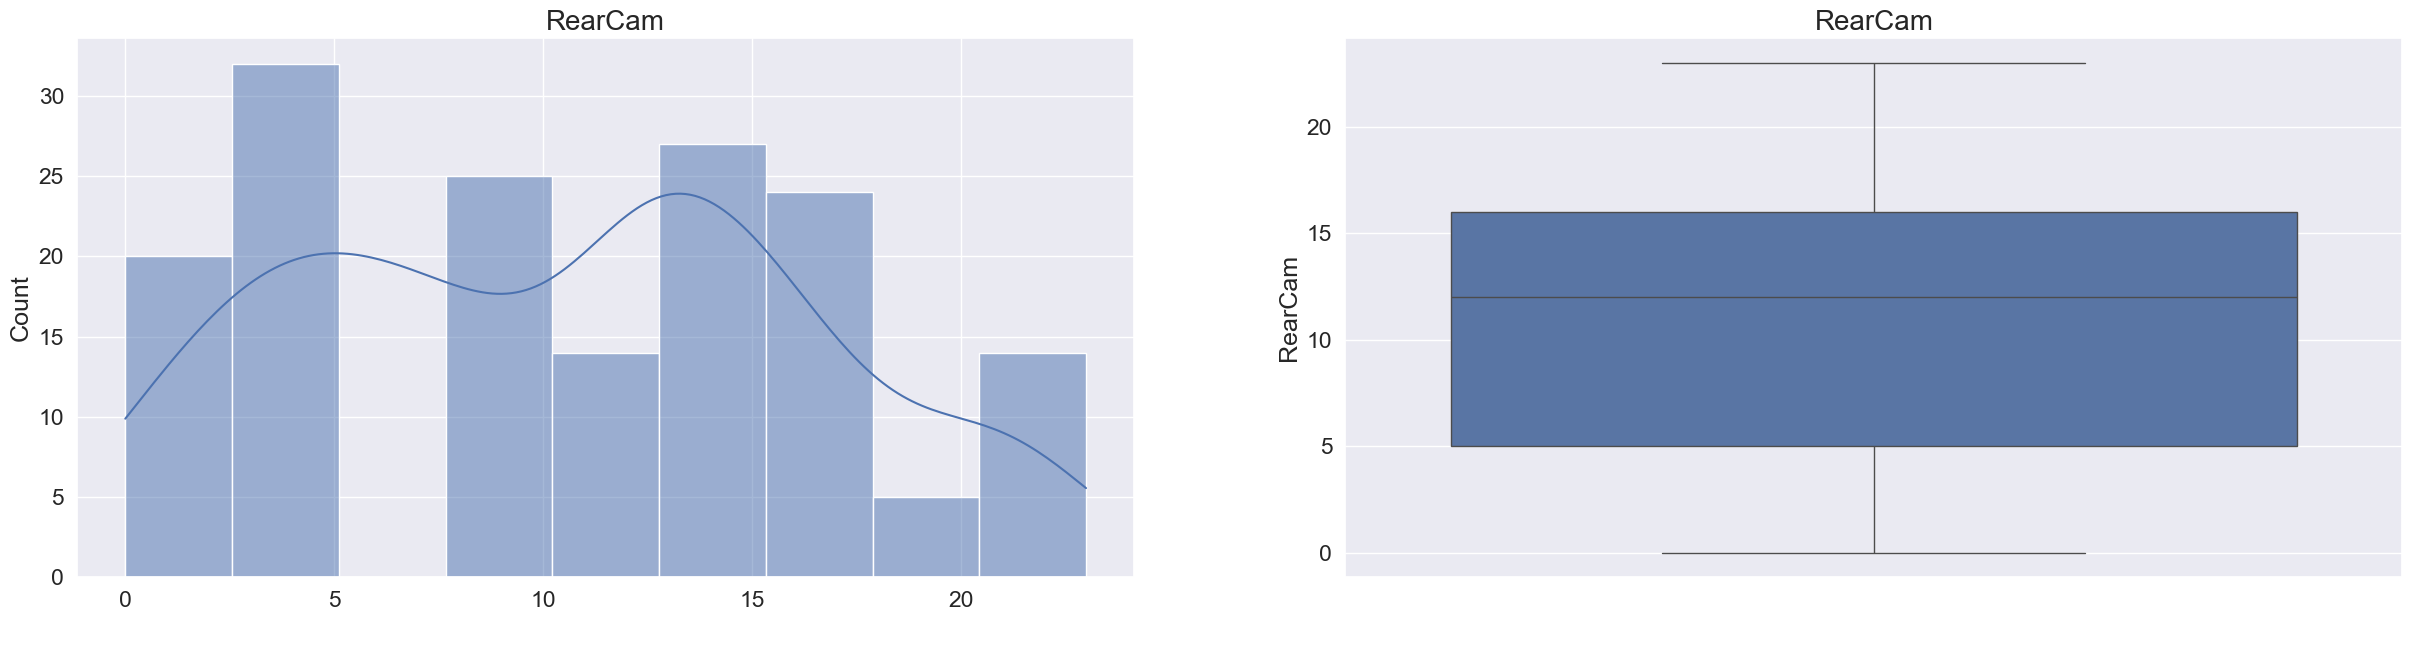

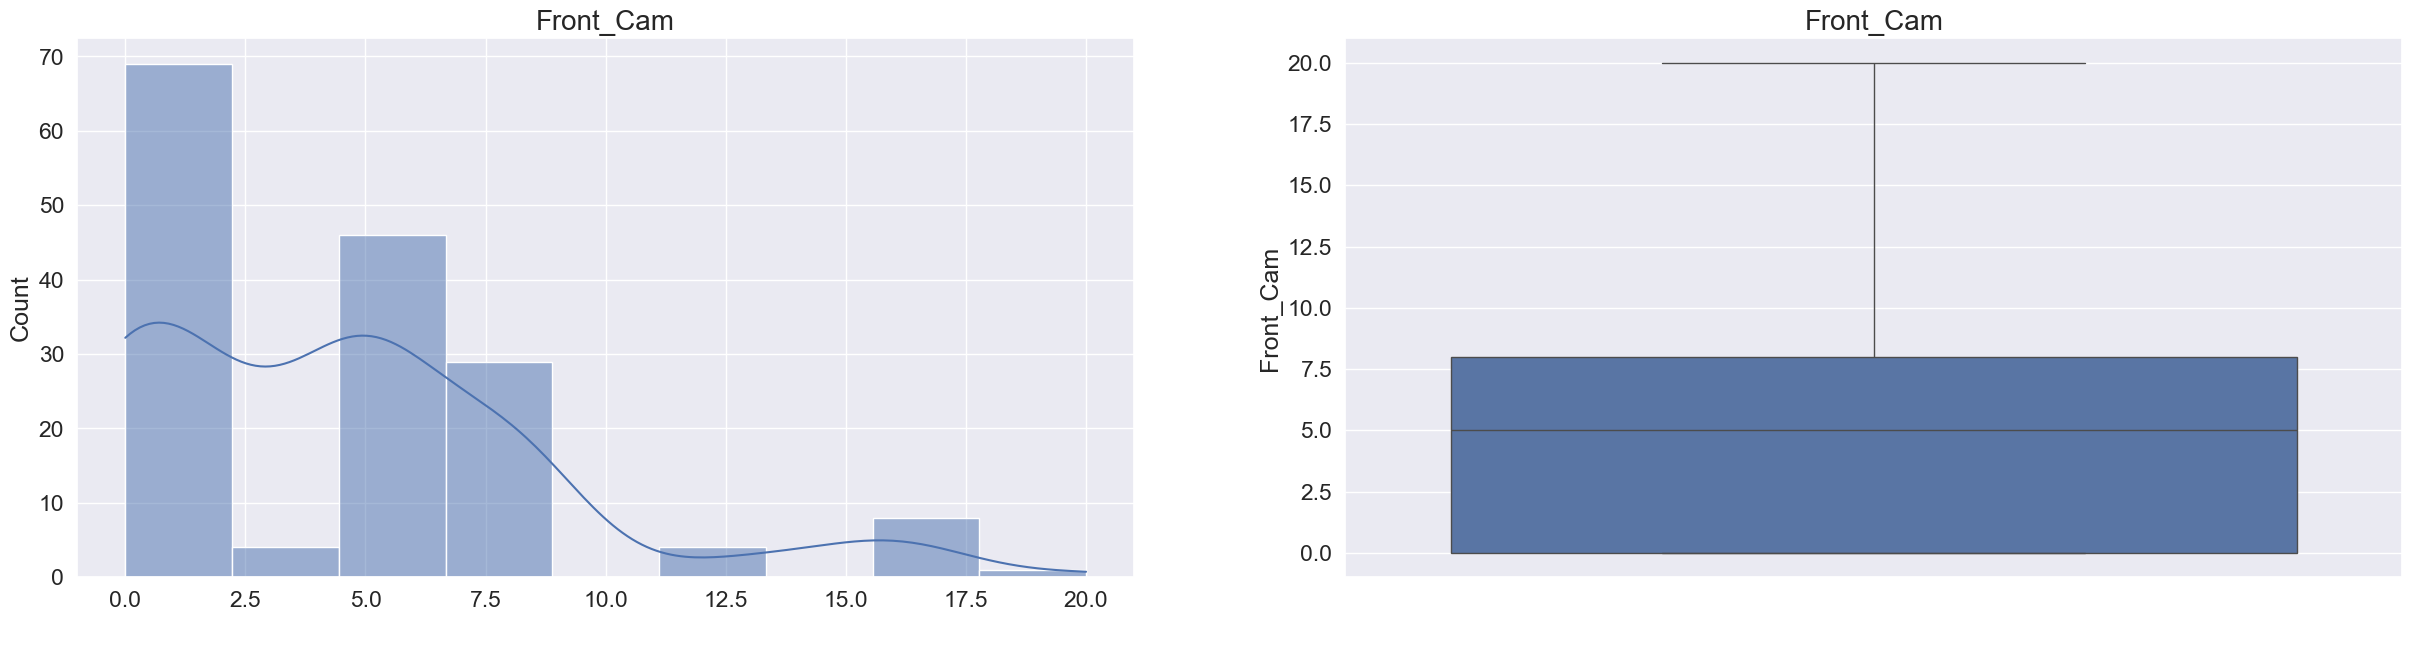

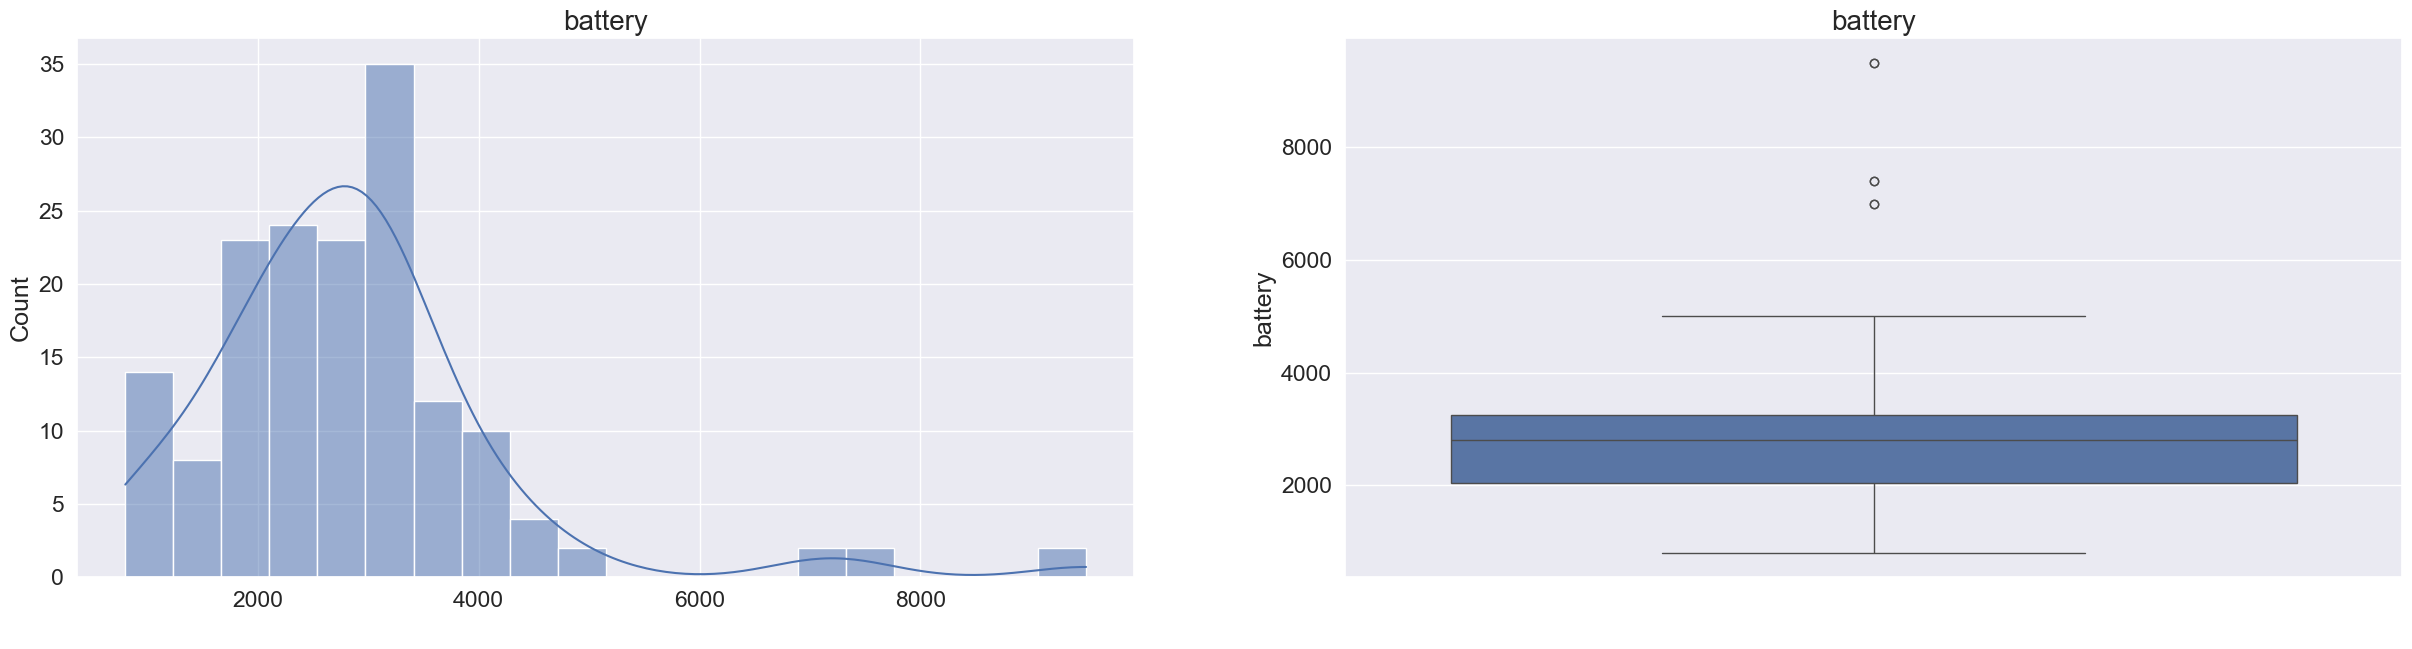

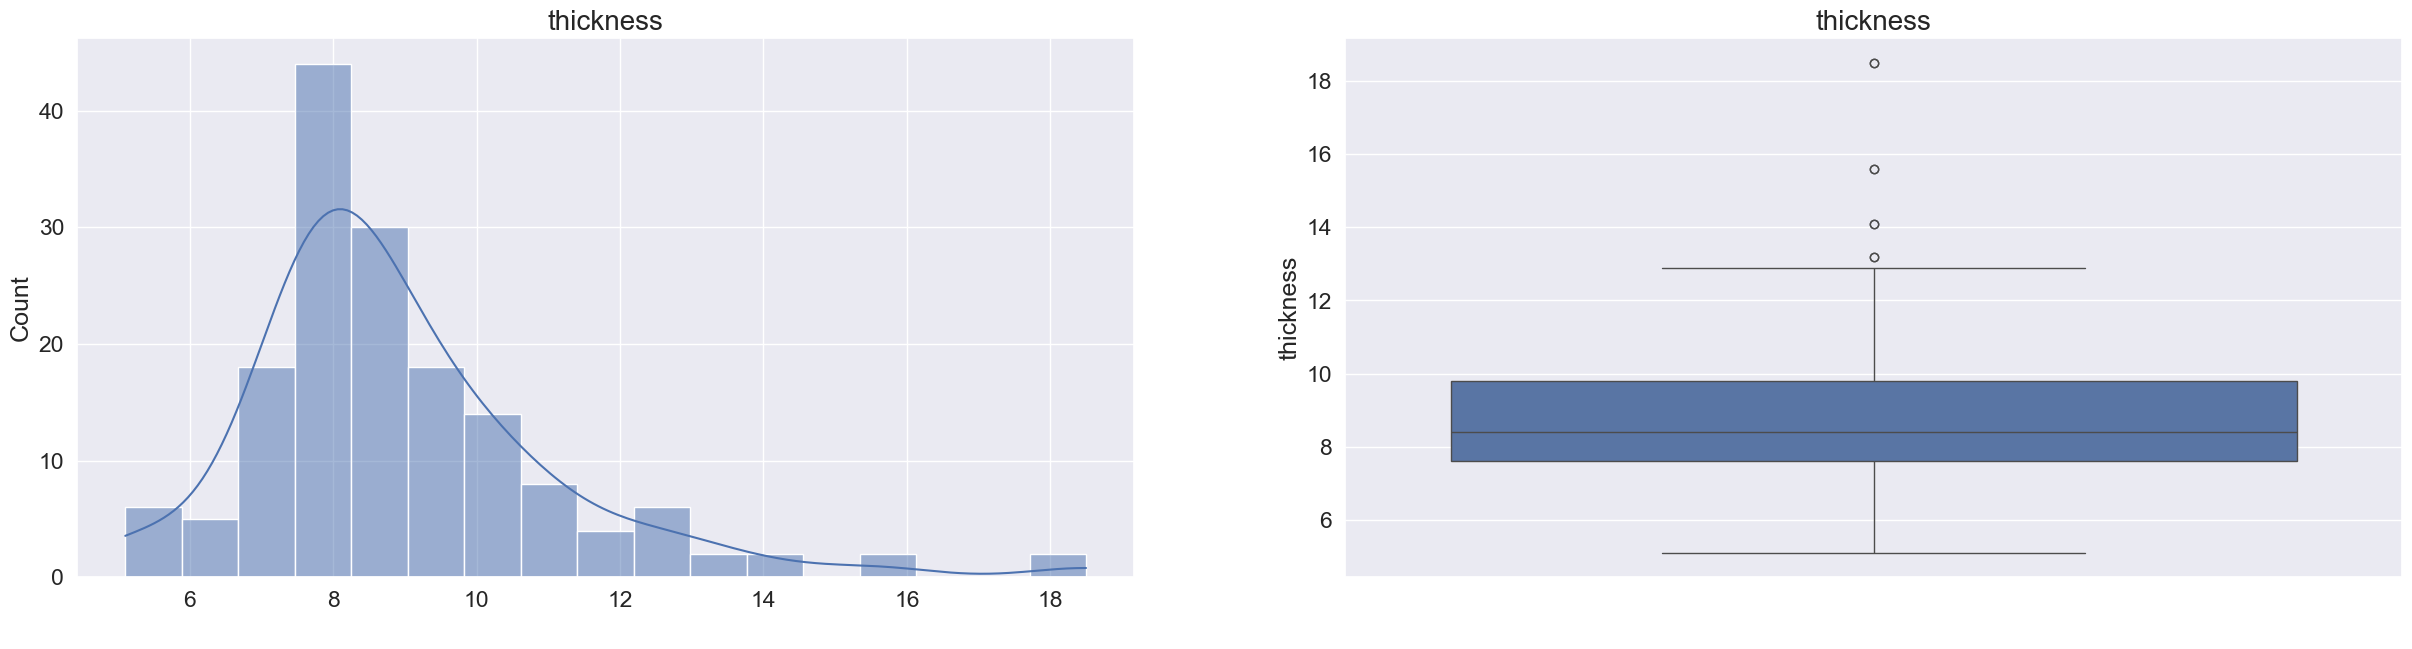

In [103]:
data1_columns = df.columns
data1_columns
# Gives us the distribution and boxplot for all the columns.
for index,col in enumerate(data1_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)

    plt.xlabel(" ")
    plt.title(col, size = 20)
    
    plt.subplot(1,2,2)
    sns.boxplot(y = df[col])
    plt.title(col, size = 20)
    plt.show()

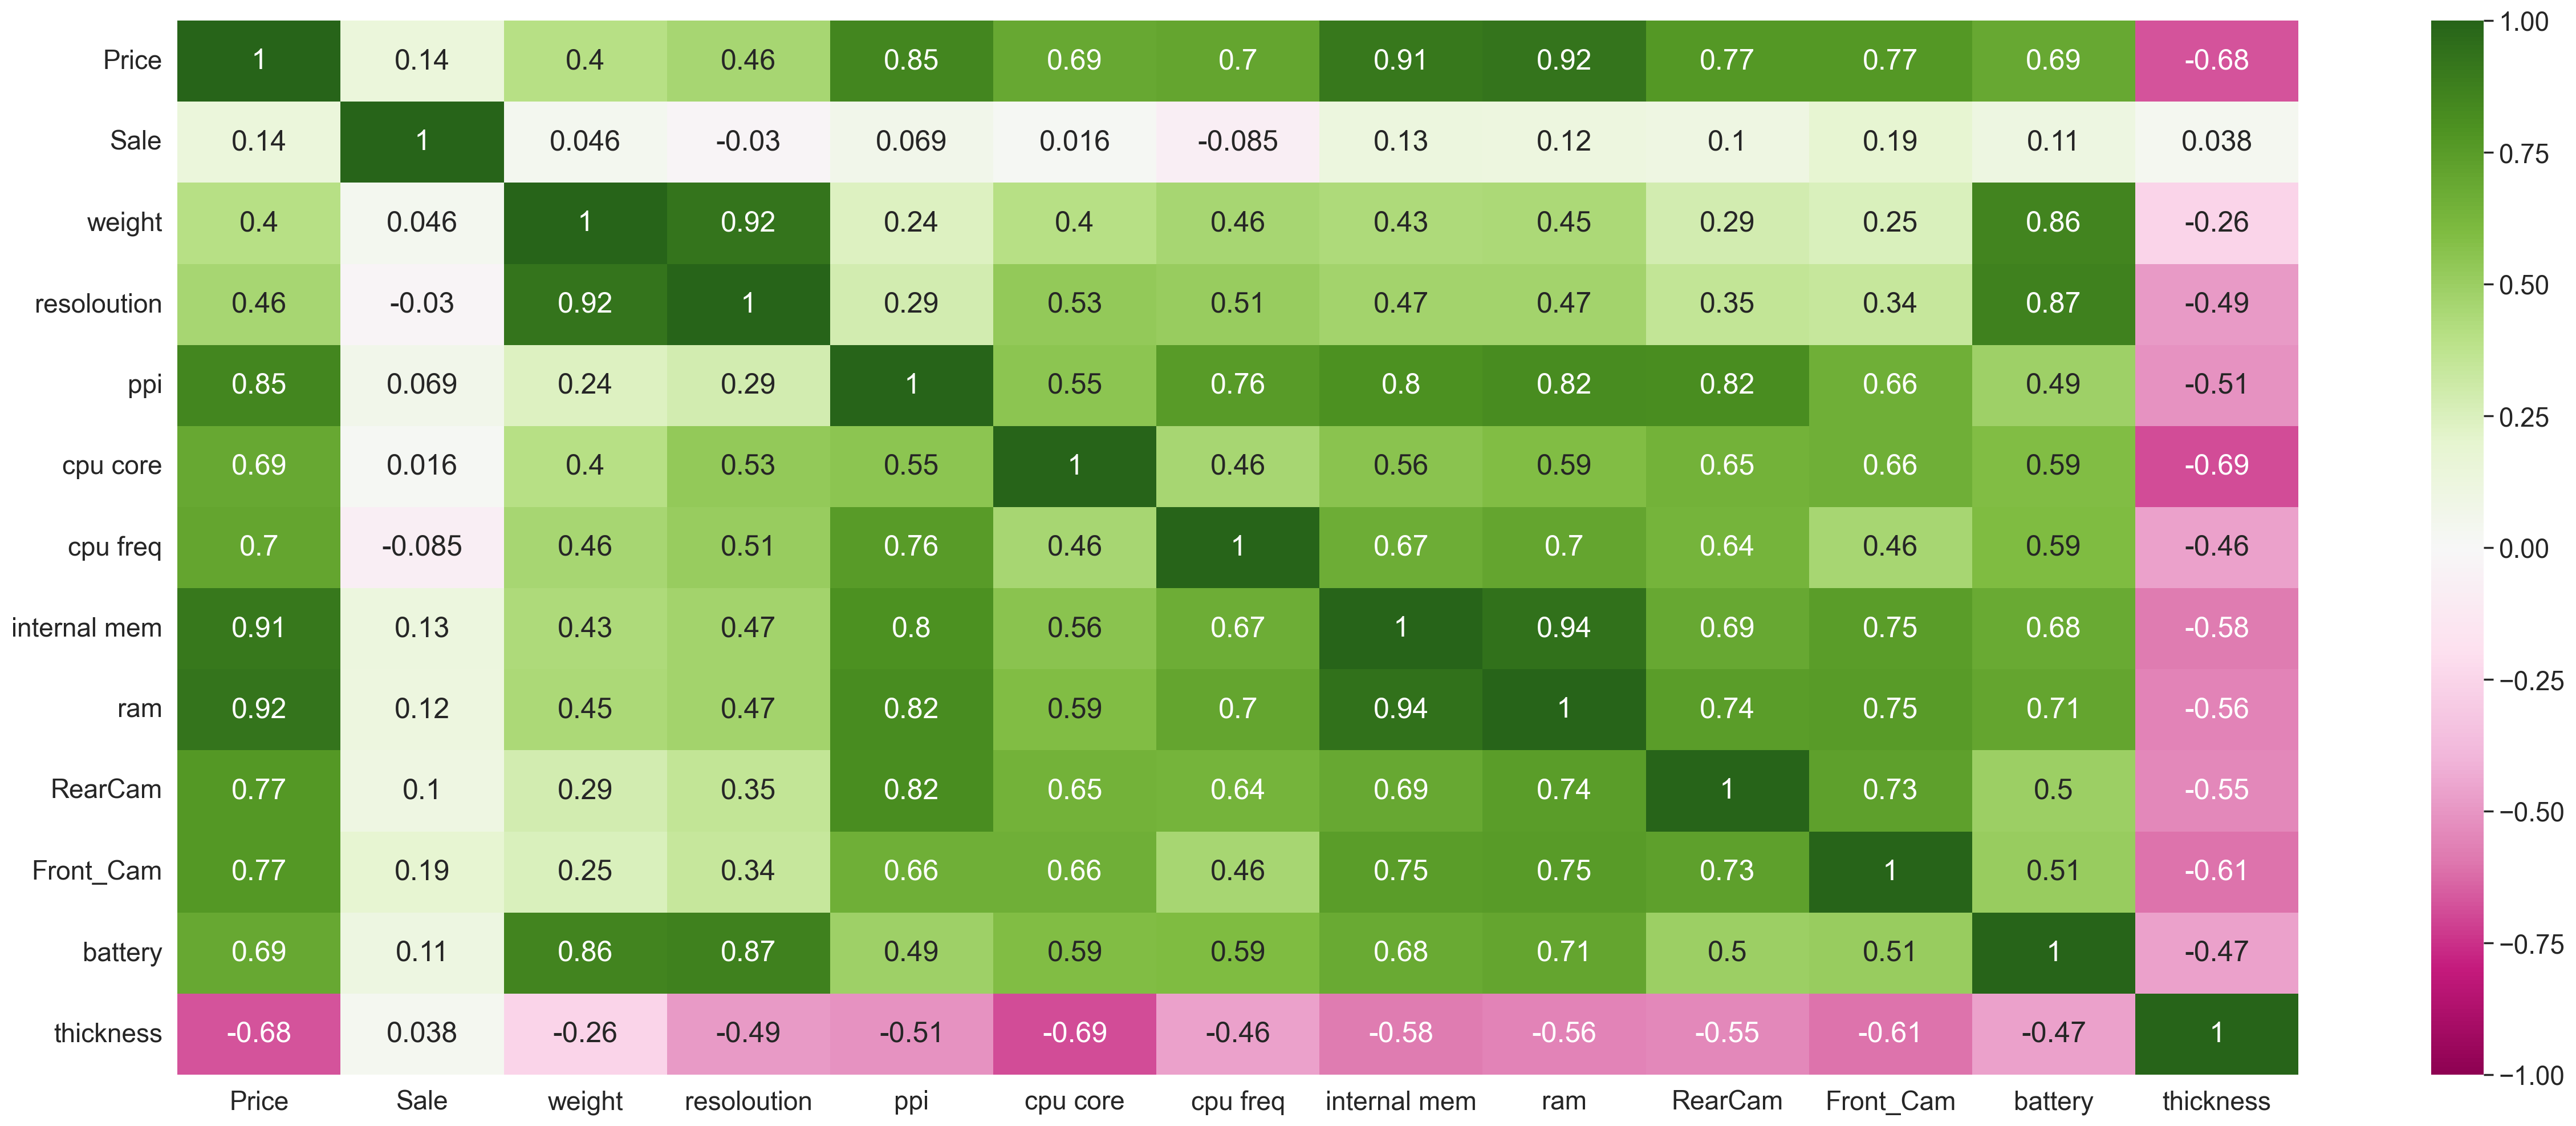

In [73]:
plt.figure(figsize = (30,12), dpi = 200)
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = +1, cmap = "PiYG")
plt.show()

In [104]:
x = df.drop("Price", axis = 1)
y = df["Price"]

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [106]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (128, 12)
y_train - >   (128,)
x_test  - >   (33, 12)
y_test  - >   (33,)


In [107]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []
testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [108]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

       
    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2) 
    testing_scores_rmse.append(test_rmse) 
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")
    print

In [79]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 94.20%, Adjusted R² = 93.60%, RMSE = 185.1172
Testing Data : R² = 93.04%, Adjusted R² = 88.86%, RMSE = 198.6835



In [80]:
evaluate_model_performance(
    model=Ridge(alpha=1.0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 94.18%, Adjusted R² = 93.57%, RMSE = 185.4698
Testing Data : R² = 92.85%, Adjusted R² = 88.56%, RMSE = 201.2893



In [81]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 94.20%, Adjusted R² = 93.60%, RMSE = 185.1200
Testing Data : R² = 93.03%, Adjusted R² = 88.84%, RMSE = 198.8092



In [82]:
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 93.92%, Adjusted R² = 93.28%, RMSE = 189.6503
Testing Data : R² = 92.08%, Adjusted R² = 87.32%, RMSE = 211.9209



In [83]:
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 96.91%, Adjusted R² = 95.05%, RMSE = 132.3953



In [110]:
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.37%, Adjusted R² = 99.30%, RMSE = 61.1134
Testing Data : R² = 97.32%, Adjusted R² = 95.71%, RMSE = 123.2599



In [85]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest"
    ]

In [86]:
df_model = pd.DataFrame(
        {"Algorithms":models,
         "Training Score R2":training_scores_r2,
         "Training Score Adjusted R2":training_scores_adj_r2,
         "Training Score RMSE":training_scores_rmse,
         "Testing Score R2":testing_scores_r2,
         "Testing Score Adjusted R2":testing_scores_adj_r2,
         "Testing Score RMSE":testing_scores_rmse,
        })
				   
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort.sort_index()

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
0,Linear Regression,94.203478,93.598624,185.117194,93.036535,88.858456,198.683461
1,Ridge,94.181375,93.574214,185.469798,92.852681,88.564290,201.289262
2,Lasso,94.203304,93.598432,185.119966,93.027720,88.844352,198.809180
3,ElasticNet,93.916111,93.281271,189.650349,92.077730,87.324367,211.920933
4,Decision Tree,100.000000,100.000000,0.000000,96.907946,95.052714,132.395299
5,Random Forest,99.306750,99.234411,64.018865,97.619650,96.191440,116.163433


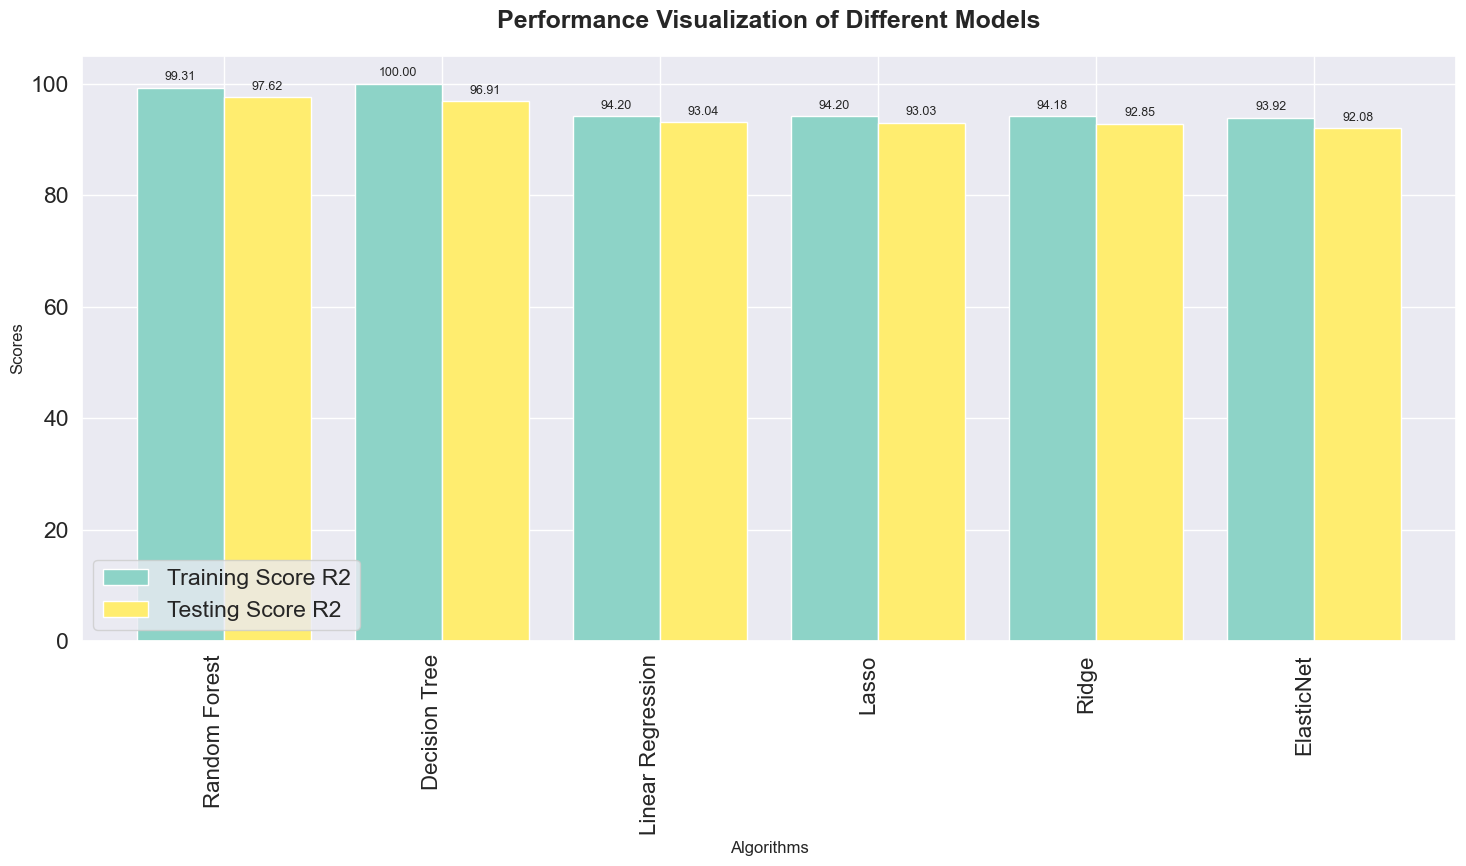

In [87]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

In [88]:
# Initialize the model
random_forest_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100, 150, 200],       # Number of trees
    'max_depth': [None, 5, 10, 15, 20],       # Tree depth
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],        # Minimum samples at a leaf
    'max_features': ['sqrt', 'log2'],     # Features considered for best split
}


# Define the GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for r2
    cv=5,                             # 3-fold cross-validation
    verbose=2,                        # Print detailed logs
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test MSE: 14788.91


In [89]:
# Create the RandomForest Regressor model
random_forest_regressor = RandomForestRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    n_estimators=50,             # Number of trees in the forest
    max_depth=10,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features='sqrt',          # Use square root of features for the best split
    random_state=42,              # Controls the randomness for reproducibility
    n_jobs=-1,                    # Use all available cores for parallel processing
    max_samples=None,             # If bootstrap=True, the number of samples to draw from X to train each base estimator
)

In [90]:
evaluate_model_performance(
    model=random_forest_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.33%, Adjusted R² = 99.26%, RMSE = 63.0898
Testing Data : R² = 97.39%, Adjusted R² = 95.83%, RMSE = 121.6097



In [91]:
import joblib
# Save the model to a file
joblib.dump(random_forest_regressor, 'cellphone_price_prediction_model.pkl')

['cellphone_price_prediction_model.pkl']